Analisis Pertanyaan Terbuka TPBIS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Words by Frequency:
             Word  Frequency
6           buku       1642
3        bantuan        883
1         bacaan        624
0           anak        574
2          bahan        387
16  perpustakaan        361
19           tbm        210
4         banyak        194
13    masyarakat        192
8           desa        179
15     pelatihan        177
5        bermutu        166
11      kegiatan        159
17        remaja        147
10    kedepannya        142
7         cerita        141
18       seperti        134
12      komputer        129
14         mohon        127
9         karena        118


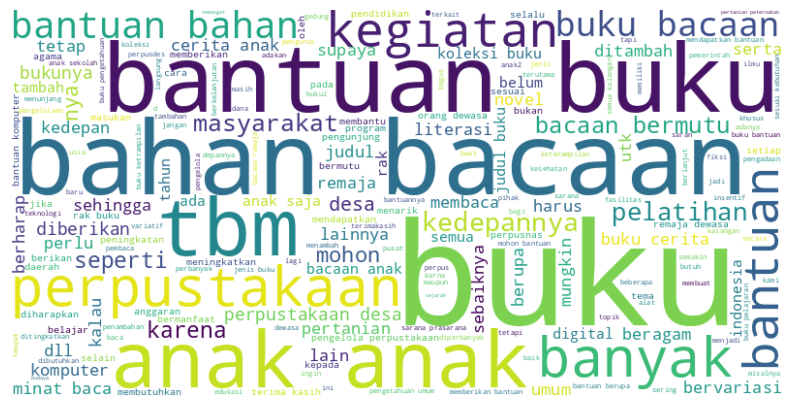

Top Trigrams:
bantuan bahan bacaan: 134
bahan bacaan bermutu: 88
bantuan buku bacaan: 20
kegiatan bantuan bahan: 14
buku bacaan bermutu: 12
buku cerita anak: 12
memberikan bantuan buku: 11
meningkatkan minat baca: 11
minat baca masyarakat: 11
bacaan anak anak: 9
Topic 0: 0.117*"buku" + 0.017*"anak" + 0.017*"bantuan" + 0.014*"cerita" + 0.009*"bacaan" + 0.009*"rak" + 0.008*"bukunya" + 0.008*"koleksi" + 0.008*"seperti" + 0.008*"remaja"
Topic 1: 0.062*"bantuan" + 0.057*"bacaan" + 0.045*"bahan" + 0.039*"buku" + 0.019*"bermutu" + 0.011*"kedepannya" + 0.011*"banyak" + 0.010*"anak" + 0.008*"tahun" + 0.007*"masyarakat"
Topic 2: 0.040*"perpustakaan" + 0.025*"bantuan" + 0.019*"desa" + 0.017*"tbm" + 0.015*"pelatihan" + 0.014*"kegiatan" + 0.013*"pengelola" + 0.011*"baca" + 0.009*"minat" + 0.009*"komputer"


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from itertools import islice

nltk.download('stopwords')

# Load Data
data = pd.read_excel("/content/BBB_qual.xlsx")  # Replace with your file path

# Define custom stopwords
custom_stopwords = set([
    "dan", "yang", "di", "ke", "dari", "ini", "itu", "untuk", "dengan", "sebagai", "ada", "yg", "lagi","agar", "dapat", "semoga", "lebih", 'enggak', 'belum'
    "adalah", "dalam", "atau", "tidak", "saya", "kita", "mereka", "akan", "bisa", "terus", "ya", "sudah", "kami", "hanya", "baik", "juga", "iya", 'sangat', 'tentang'
])

# Preprocessing
def preprocess_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        text = str(text)
    words = text.lower().split()
    words = [word for word in words if word not in custom_stopwords]
    return " ".join(words)

# Apply preprocessing to the 'Qualitative' column
data['Qualitative_clean'] = data['qualitative'].astype(str).apply(preprocess_text)

# Combine all text for analysis
all_text = data['Qualitative_clean']

# --- 1. FREQUENCY ANALYSIS ---
vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(all_text)
word_counts = pd.DataFrame(
    {'Word': vectorizer.get_feature_names_out(), 'Frequency': X.toarray().sum(axis=0)}
)
print("Top Words by Frequency:\n", word_counts.sort_values(by='Frequency', ascending=False))

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_text))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# --- 2. TRIGRAM ANALYSIS ---
def get_trigrams(texts, top_n=10):
    trigrams = [tuple(islice(text.split(), i, i+3)) for text in texts for i in range(len(text.split())-2)]
    trigram_counts = Counter(trigrams)
    return trigram_counts.most_common(top_n)

trigram_results = get_trigrams(all_text)
print("Top Trigrams:")
for trigram, freq in trigram_results:
    print(f"{' '.join(trigram)}: {freq}")

# --- 3. TOPIC MODELING ---
# Tokenize the text
tokenized_text = [text.split() for text in all_text]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# LDA Model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Display Topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Top Words by Frequency:
           Word  Frequency
6         buku       1592
3        bantu        976
1         baca        881
2        bahan        387
16     pustaka        361
0         anak        346
4       banyak        282
8        depan        269
17      tambah        265
5         beri        209
18         tbm        192
14  masyarakat        188
13       latih        181
19     tingkat        180
9         desa        177
10        giat        177
12      kelola        174
15        mutu        171
11       harap        146
7        butuh        146


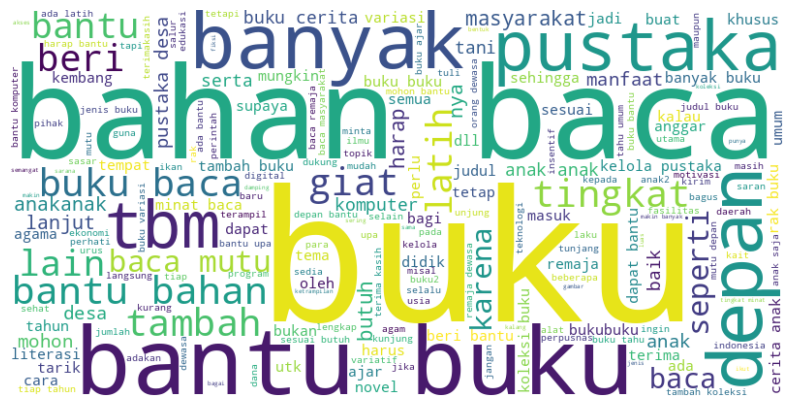

Top Trigrams:
bantu bahan baca: 150
bahan baca mutu: 97
beri bantu buku: 24
bantu buku baca: 24
buku cerita anak: 22
tambah koleksi buku: 20
tingkat minat baca: 19
baca mutu depan: 18
minat baca masyarakat: 17
depan bantu buku: 17
Topic 0: 0.098*"buku" + 0.068*"baca" + 0.050*"bantu" + 0.033*"bahan" + 0.024*"anak" + 0.019*"depan" + 0.015*"tambah" + 0.015*"mutu" + 0.014*"banyak" + 0.011*"masyarakat"
Topic 1: 0.055*"buku" + 0.048*"bantu" + 0.026*"pustaka" + 0.023*"banyak" + 0.019*"rak" + 0.016*"latih" + 0.015*"tambah" + 0.014*"makin" + 0.012*"depan" + 0.012*"cara"
Topic 2: 0.037*"pustaka" + 0.031*"tbm" + 0.026*"bantu" + 0.024*"giat" + 0.021*"desa" + 0.019*"kelola" + 0.014*"tingkat" + 0.010*"masyarakat" + 0.010*"perpusnas" + 0.010*"latih"


In [42]:
!pip install Sastrawi
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel
import nltk
from collections import Counter
from itertools import islice
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
# Load Data
data = pd.read_excel("/content/BBB_qual.xlsx")  # Replace with your file path

# Define custom stopwords
custom_stopwords = set([
    "dan", "yang", "di", "ke", "dari", "ini", "itu", "untuk", "dengan", "sebagai", "ada", "yg", "lagi", "agar", "dapat", "semoga", "lebih", 'enggak', 'belum',
    "adalah", "dalam", "atau", "tidak", "saya", "kita", "mereka", "akan", "bisa", "terus", "ya", "sudah", "kami", "hanya", "baik", "juga", "iya", 'sangat', 'tentang'
])

# Initialize Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenization
    words = [stemmer.stem(word) for word in words if word not in custom_stopwords]  # Stemming & stopword removal
    return " ".join(words)

# Apply preprocessing
data['Qualitative_clean'] = data['qualitative'].astype(str).apply(preprocess_text)

# Combine all text for analysis
all_text = data['Qualitative_clean']

# --- 1. FREQUENCY ANALYSIS ---
vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(all_text)
word_counts = pd.DataFrame(
    {'Word': vectorizer.get_feature_names_out(), 'Frequency': X.toarray().sum(axis=0)}
)
print("Top Words by Frequency:\n", word_counts.sort_values(by='Frequency', ascending=False))

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_text))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# --- 2. TRIGRAM ANALYSIS ---
def get_trigrams(texts, top_n=10):
    trigrams = [tuple(islice(text.split(), i, i+3)) for text in texts for i in range(len(text.split())-2)]
    trigram_counts = Counter(trigrams)
    return trigram_counts.most_common(top_n)

trigram_results = get_trigrams(all_text)
print("Top Trigrams:")
for trigram, freq in trigram_results:
    print(f"{' '.join(trigram)}: {freq}")

# --- 3. TOPIC MODELING ---
# Tokenize the text
tokenized_text = [text.split() for text in all_text]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# LDA Model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Display Topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


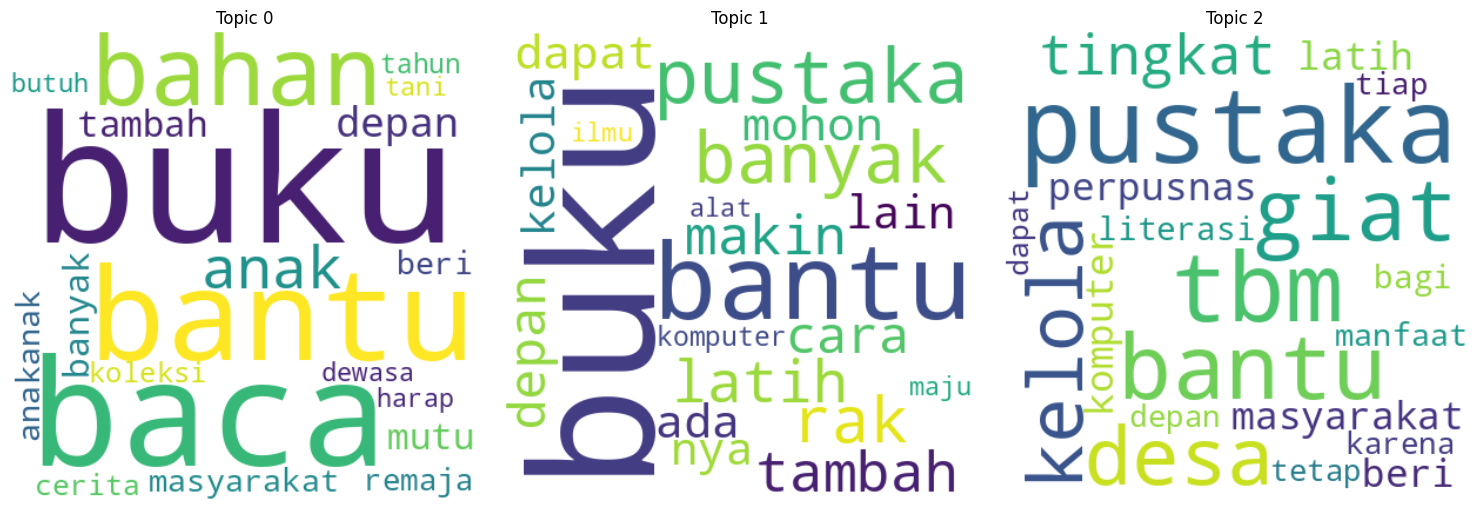

In [43]:
from wordcloud import WordCloud

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(lda_model.show_topic(i, 20))  # Ambil 20 kata per topik
    wc = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"Topic {i}")

plt.tight_layout()
plt.show()


In [44]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualisasi topik LDA
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda_visualization.html')


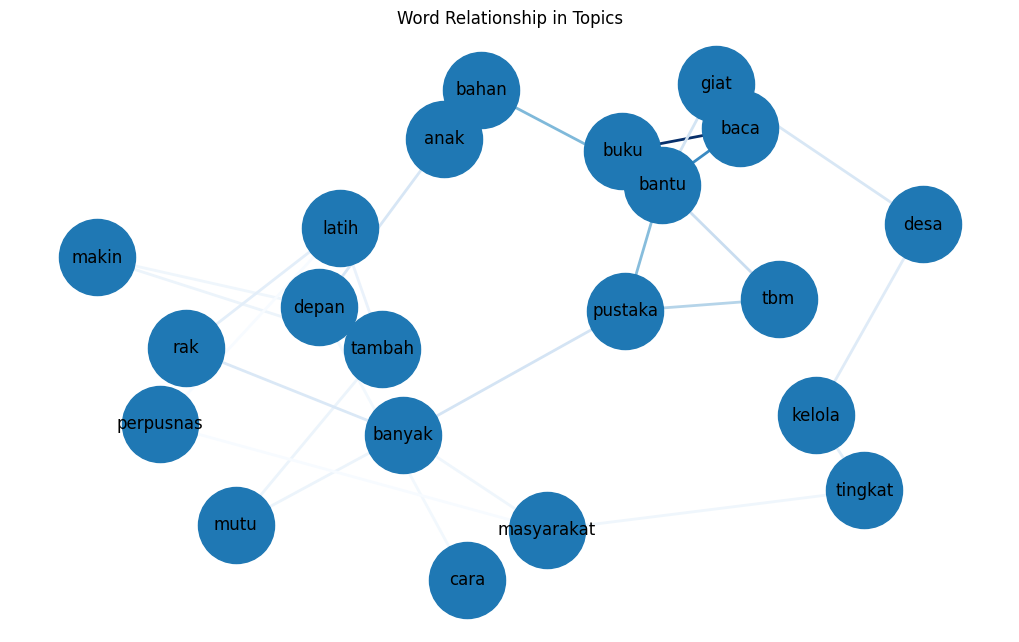

In [45]:
import networkx as nx

# Buat Graph
G = nx.Graph()

for topic in lda_model.show_topics(num_words=10, formatted=False):
    for i in range(len(topic[1])-1):
        G.add_edge(topic[1][i][0], topic[1][i+1][0], weight=topic[1][i][1])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [d['weight'] * 10 for (u, v, d) in edges]  # Skala bobot

# Plot Graph
nx.draw(G, pos, with_labels=True, node_size=3000, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues, font_size=12)
plt.title("Word Relationship in Topics")
plt.show()


<ipython-input-34-7186a922a4e5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_bigrams['Bigram'].astype(str), x=df_bigrams['Frequency'], palette="Blues_r")


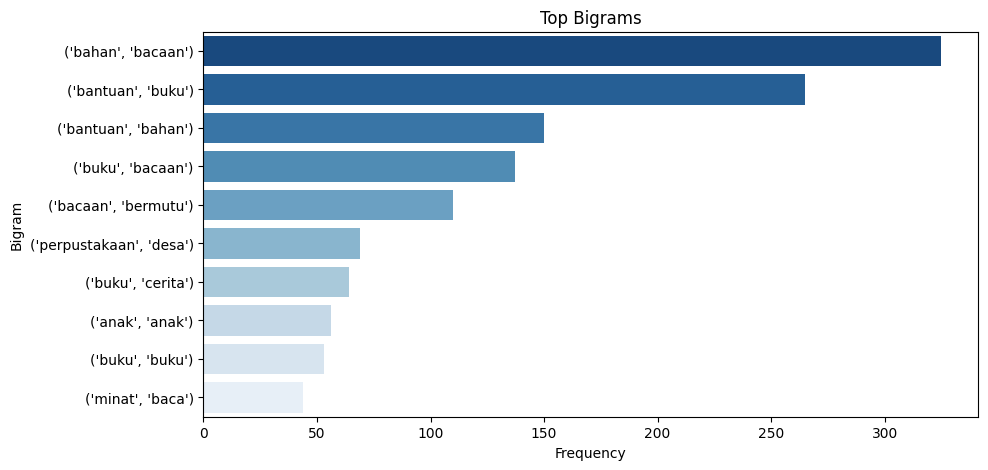

<ipython-input-34-7186a922a4e5>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_trigrams['Trigram'].astype(str), x=df_trigrams['Frequency'], palette="Reds_r")


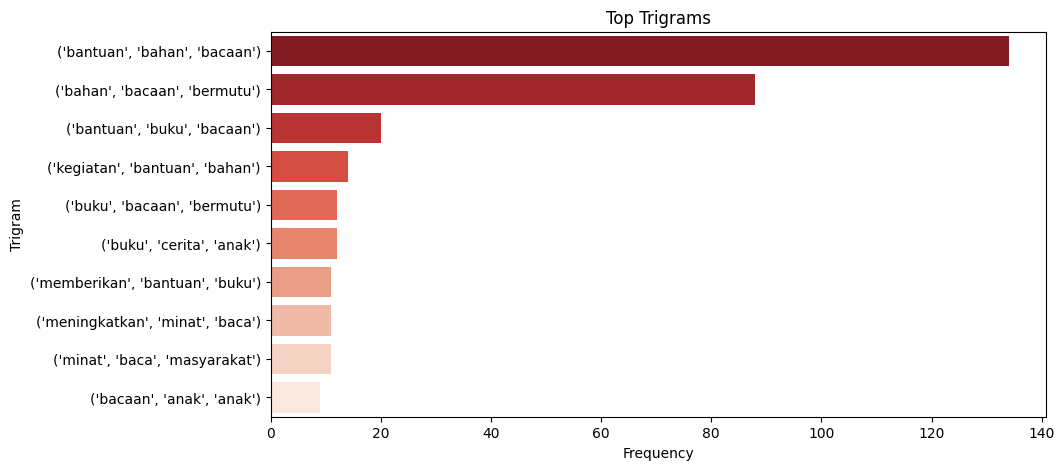

In [34]:
from collections import Counter
from itertools import islice

# Function to get n-grams
def get_ngrams(texts, n=3, top_n=10):
    ngrams = [tuple(islice(text.split(), i, i+n)) for text in texts for i in range(len(text.split())-n+1)]
    ngram_counts = Counter(ngrams)
    return ngram_counts.most_common(top_n)

bigram_results = get_ngrams(all_text, n=2)
trigram_results = get_ngrams(all_text, n=3)

# Convert to DataFrame for visualization
df_bigrams = pd.DataFrame(bigram_results, columns=['Bigram', 'Frequency'])
df_trigrams = pd.DataFrame(trigram_results, columns=['Trigram', 'Frequency'])

# Plot Bigrams
plt.figure(figsize=(10,5))
sns.barplot(y=df_bigrams['Bigram'].astype(str), x=df_bigrams['Frequency'], palette="Blues_r")
plt.title("Top Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

# Plot Trigrams
plt.figure(figsize=(10,5))
sns.barplot(y=df_trigrams['Trigram'].astype(str), x=df_trigrams['Frequency'], palette="Reds_r")
plt.title("Top Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.show()
